## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#proportion of users converted
(df.converted == True).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#The number of times the 'new_page' and 'treatment' don't line up
df.query('group == "treatment" & landing_page != "new_page"').count()[0] + \
df.query('group != "treatment" & landing_page == "new_page"').count()[0]


3893

f. Do any of the rows have missing values?

In [7]:
df.info()
#None of the rows have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#new dataframe df2
df2 = df.query('group == "treatment" & landing_page == "new_page" or group == "control" & landing_page == "old_page"') 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.user_id.count()

290585

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.user_id.value_counts().head(5)

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset ="user_id", inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
#For answering Quiz-3
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [16]:
#probability of an individual converting regardless of the page they receive
(df2.converted == True).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('converted == True & group == "control"').shape[0]/df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('converted == True & group == "treatment"').shape[0]/df2.query('group == "treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> **Answer** <br>
4.a. Probability of an individual converting regardless of the page they receive: **0.11959708724499628** <br>
4.b. Given that an individual was in the control group, the probability they converted is : **0.1203863045004612** <br>
4.c. Given that an individual was in the treatment group,the probability they converted is: **0.11880806551510564** <br>
4.d. Probability that an individual received the new page: **0.5000619442226688** <br>

> From_4.d. we can see that probability of getting both 'new_page' and 'old_page' are 0.50. So there was equal chance of getting the new_page and old_page. And, Probability of conversion from both 'new_page' and 'old_page' are very similar. So, I think there is **not** enough sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **Answer**<br>
$H_{0}$ : $P_{new}$ - $P_{old}$  <=  0 <br>
$H_{1}$ : $P_{new}$ - $P_{old}$  >   0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# convert rate for  𝑝𝑛𝑒𝑤  under the null
P_new = (df2.converted == True).mean()
P_new 

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# convert rate for  𝑝𝑜𝑙𝑑  under the null
P_old = (df2.converted == True).mean()
P_old 

0.11959708724499628

c. What is $n_{new}$?

In [22]:
#number of unique user_id in new page
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [23]:
#number of unique user_id in old page
n_old = df2.query("group == 'control'").user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# Simulating  ''𝑛_𝑛𝑒𝑤''  transactions with a convert rate of  '𝑝_𝑛𝑒𝑤 ' under the null
new_page_converted = np.random.choice([1,0], size = n_new, p =[P_new, 1- P_new], replace=True)


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# Simulating  ''𝑛_old''  transactions with a convert rate of  '𝑝_old ' under the null
old_page_converted = np.random.choice([1,0], size = n_old, p =[P_old, 1- P_old], replace=True)


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.00092034089698395105

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
#Simulate 10,000  𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑  values
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p =[P_new, 1- P_new], replace=True)
    old_page_converted = np.random.choice([1,0], size = n_old, p =[P_old, 1- P_old], replace=True)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

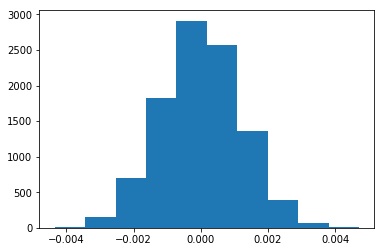

In [28]:
plt.hist(p_diffs);


This plot is looks normal to me. Mean is near 0 and two-tailed distribution. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
actual_difference_observed = df2.query('group == "treatment"').converted.mean() - \
df2.query('group == "control"').converted.mean()

(p_diffs > actual_difference_observed).mean()


0.90559999999999996

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> **Answer**
>- In part j, **(p_diffs > actual_difference_observed).mean()** is the **P-value**
>- We computed the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
>- As P- value > Type-I-Error-Rate of 0.05; we fail to reject null hypothesis. That means we fail to reject our hypothesis that convert rate for p_new is less than or equal to 𝑝_old. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == True' ).shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == True').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
#https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>**Answer**

>- From Z-score table, for single(left) we have found the critical z_score value for alpha = 0.05 is 1.6449. (https://www.vedantu.com/maths/z-score-table). |z_score| is not greater than critical z_score value. That means we fail to reject our hypothesis that convert rate for p_new is less than or equal to 𝑝_old. This is the same as we get before.<br>

>- p_value found from here also agrees with our previous findings




**Answer** <br>


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> **Answer.** <br> We will use Logistic Regression to predict only two possible outcomes in conversion. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2_copy = df2.copy()

In [33]:
df2_copy['intercept'] = 1
df2_copy['ab_page'] = pd.get_dummies(df2_copy['group'])['treatment']

In [34]:
#df2_copy[['not_converted','converted']] = pd.get_dummies(df2_copy['converted'])
#df2_copy = df2_copy.drop('not_converted', axis=1)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
df2_copy.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [36]:
log_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 10:58 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> **Answer** <br> - The p_value associated with ab_page is 0.1899. <br> - The p_value associated with ab_page is different than p_value of z_score. The differece is beacuse of the difference in null hypothesis in each case. In part-2, p_value meant the probabilty of selecting alternative hypothesis when null hypothesis is true. But here the null hypothesis is,  there is no significant relationship between the conversion rate and ab_page. Where If p_value is greater than 0.05 we fail to reject the null hyothesis. So, since here p_value associated with ab_page is larger than 0.05 we fail to reject null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **Answer** <br>
>- In regresion model, it is always wise to check all the factors that might influence our independent variable. For all the factors, we can calculate the p_values and for the factors p_value is greater than 0.05 we can eliminate those factors from the model and we can make the regression eqation with only the factors whose p-value is equal or less than 0.05. <br> 
>- In this example, we can consider time of the day, day of the week extracted from timestamp and add into our regression model. <br> 
>- Only disadvantages of adding all the variables in the regression model without checking their p_value is that not all the factors will have significant effect on independent variable. 



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [39]:
### Creating the necessary dummy variables
df_new['intercept'] = 1
df_new['ab_page'] = pd.get_dummies(df_new['group'])['treatment']
df_new['UK']= pd.get_dummies(df_new['country'])['UK']
df_new['US']= pd.get_dummies(df_new['country'])['US']
df_new['CA']= pd.get_dummies(df_new['country'])['CA']

In [ ]:
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,1,0,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,1,0


In [ ]:
### Fitting Linear Model And Obtain the Results

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','CA']])
results = log_mod.fit()

In [ ]:
results.summary2()

> Does it appear that country had an impact on conversion? <br>
**Answer**
> - From the result, it is clear that country doesn't have any statisticaly significant effect on conversion. p_value of 'UK' and 'CA' both have p_value greater than 0.05. So, we fail to reject null hypothesis :-  there is no significant relationship between the conversion rate and country.
> - Also we can see the coef for UK, CA, ab_page and these coefficient are so small(close to zero) that we don't need to add those in our regresion equation.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

In [ ]:
### Fitting Linear Model And Obtain the Results with interactio effectcs 
#[Ignoring higher level interaction effect]

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','CA','CA_page','UK_page']])
results = log_mod.fit()

In [ ]:
results.summary2()

> Does it appear that interaction between page and country had an impact on conversion? <br>
**Answer**
> - From the result, it is clear that **interaction between page and country doesn't** have any statisticaly significant effect on conversion. p_value of 'CA_page' and 'UK_page' both have p_value greater than 0.05. So, we fail to reject null hypothesis :-  there is no significant relationship between the conversion rate and interaction between page and country.
> - Also we can see the coef for CA_page, UK_page. These coefficient are so small(close to zero) that we don't need to add those in our regression equation.

<a id='conclusions'></a>
> ## Conclusions

>- From the above hypothesis testing and regresion analysis, it was found that conversion rate is not dependent on new_page or old_page. It's also not dependent on coutries of the users. 

>- If we take **Practical reasoning** to make our decision, we can lauch any pages if our main goal is to maximize conversion rate. Both pages will give same conversion rate statistically.

    




> ## Limitations:

> We haven't investigated all the factors possible from the dataset provided. For example, we could have considered time of the day, day of the week extracted from timestamp and check relation with our dependent variable conversion rate. Also, there might be other factors that were not included in the dataset, that could have effect on our dependent variable.